  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     -------------------------------------- 949.2/949.2 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------------- -------------------- 0.8/1.6 MB 3.7 MB/s eta 0:00:01
   -------------------------------- ------- 1.3/1.6 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 3.3 MB/s eta 0:00:00
  Created wheel for multitasking: filename=

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
C:\Users\DELL\AppData\Local\Temp\ipykernel_12188\2656073238.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start="2023-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Dataset Shape: (501, 5)
Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.330635  129.079551  122.443150  128.468178  112117500
2023-01-04  124.602715  126.870731  123.340517  125.125343   89113600
2023-01-05  123.281326  125.993082  123.024948  125.361983   80962700
2023-01-06  127.817368  128.478048  123.153152  124.257579   87754700
2023-01-09  128.340012  131.554685  128.083633  128.655569   70790800
Mean Squared Error: 78.24
R² Score: 0.28


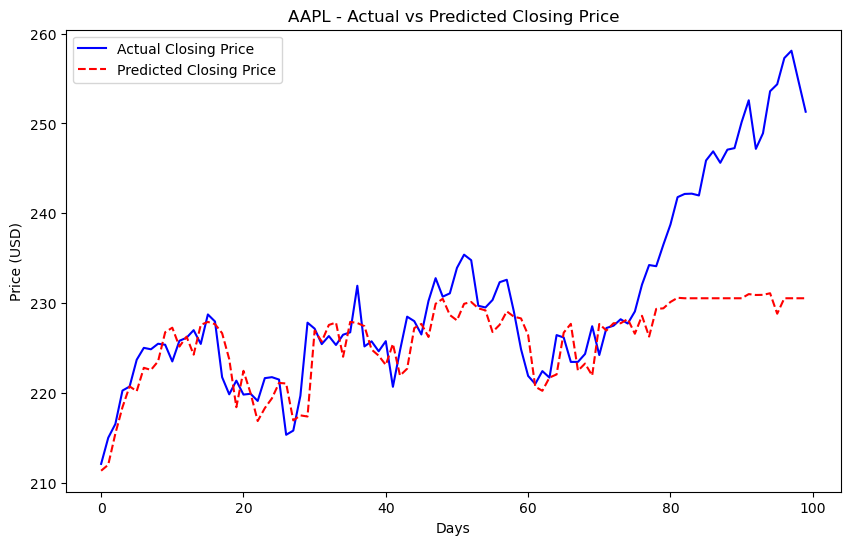

In [2]:
# First, install the yfinance package
!pip install yfinance

# Task 2: Predict Future Stock Prices (Short-Term)

# 1. Import libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 2. Select a stock and load historical data
stock_symbol = "AAPL"  # Example: Apple Inc.
data = yf.download(stock_symbol, start="2023-01-01", end="2024-12-31")

print("Dataset Shape:", data.shape)
print(data.head())

# 3. Prepare features and target
# Target: Next day's Close price
data["Target"] = data["Close"].shift(-1)

# Drop the last row (since Target will be NaN there)
data = data.dropna()

features = ["Open", "High", "Low", "Volume"]
X = data[features]
y = data["Target"]

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 5. Choose a model (Linear Regression OR Random Forest)
# model = LinearRegression()
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 6. Train the model
model.fit(X_train, y_train)

# 7. Make predictions
y_pred = model.predict(X_test)

# 8. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 9. Plot Actual vs Predicted Closing Prices
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual Closing Price", color="blue")
plt.plot(y_pred, label="Predicted Closing Price", color="red", linestyle="--")
plt.title(f"{stock_symbol} - Actual vs Predicted Closing Price")
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()